In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use(['seaborn-v0_8'])

In [72]:
df = pd.read_csv(r"../waveform.csv")

In [73]:
signal = df['voltage']
t = df['time']
dt = t[1]-t[0]

In [74]:
## Compute Fourier Transform
n = len(t) * 100
fft = np.fft.fft(signal, n) #computes the fft
ampl = abs(fft) / n
freq = (1/(dt*n)) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n / 1000), dtype=np.int32) #first half index

In [75]:
## Filter out noise
threshold = 0.1
clean_idxs = ampl > threshold #array of 0 and 1
fft_clean = fft * clean_idxs #zero out all the unnecessary powers
ampl_clean = ampl * clean_idxs

signal_filtered = np.fft.ifft(fft_clean) #inverse fourier transform

ValueError: x and y must have same first dimension, but have shapes (14000,) and (1400000,)

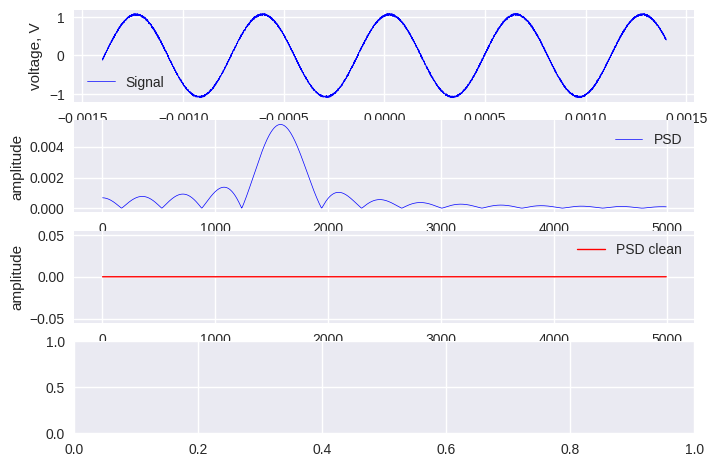

In [76]:
## Visualization
fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Signal')
ax[0].set_xlabel('time, s')
ax[0].set_ylabel('voltage, V')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(ampl[idxs_half]), color='b', lw=0.5, label='PSD')
ax[1].set_xlabel('frequencies, Hz')
ax[1].set_ylabel('amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(ampl_clean[idxs_half]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('frequencies, Hz')
ax[2].set_ylabel('amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal')
ax[3].set_xlabel('time, s')
ax[3].set_ylabel('voltage, V')
ax[3].legend()

plt.subplots_adjust(hspace=1)
plt.show()

In [ ]:
am = 2 * ampl[idxs_half].max()
fr = freq[ampl[idxs_half].argmax()]

In [77]:
am

0.002368518090644173

In [78]:
fr

1710.7142857151714

In [79]:
ampl.max()

0.005427493805291355

In [80]:
np.amax(ampl)

0.005427493805291355